In [1]:
import CalculatedFieldSubroutines as cfs
import pandas as pd
from CalculatedFieldSubroutines import BinaryDrivingMode
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
gmIDS=cfs.list_whitelisted_gmIDs()

In [3]:
GreengmIDs=[]
for gmID in gmIDS:
    if cfs.give_route(gmID)=="Green":
        GreengmIDs.append(gmID)
        

In [4]:
print (GreengmIDs)

['a231c0b0-f142-11ee-ba76-fb353e7798cd', '8b0593cc-cb4e-11ee-909c-e1dc60cf66f9', '99b9f446-f1b2-11ee-bad3-fb353e7798cd', 'bf9157f0-f16b-11ee-ba9e-fb353e7798cd', '53fad09e-f0f7-11ee-ba2f-fb353e7798cd', 'bbbd0cc6-f0dc-11ee-ba1e-fb353e7798cd', '9df14b4e-f172-11ee-baa6-fb353e7798cd', '3c415ade-d353-11ee-b437-336917683bb8', '0f3cdf60-f1f6-11ee-bb00-fb353e7798cd', '5774dcde-f196-11ee-babe-fb353e7798cd', '236836f6-f1dd-11ee-bae8-fb353e7798cd', 'fa9cba86-f0f0-11ee-ba2a-fb353e7798cd', '8e5c4fc2-f149-11ee-ba7f-fb353e7798cd', '25135418-f250-11ee-bb4a-fb353e7798cd', '044d976e-f0e5-11ee-ba20-fb353e7798cd', '88b0613a-d35d-11ee-b437-336917683bb8', '3a7dc9a6-f042-11ee-b974-fb353e7798cd', '3ed4aa16-f1d6-11ee-bae6-fb353e7798cd', '5afabc8c-f035-11ee-b966-fb353e7798cd', '1c74d294-f1e4-11ee-baf0-fb353e7798cd', 'ba87f3ec-f07e-11ee-b9b4-fb353e7798cd', 'd846a080-f115-11ee-ba51-fb353e7798cd', '25641404-cb66-11ee-909c-e1dc60cf66f9', '73bc30cc-f150-11ee-ba84-fb353e7798cd', 'cf7148d8-f058-11ee-b98a-fb353e7798cd',

In [5]:
print (len(GreengmIDs))

81


In [6]:
final_df = pd.DataFrame()

In [7]:
training_GreengmIDs_num = int(81 * .8)
test_GreengmIDs_num = len( GreengmIDs) - training_GreengmIDs_num
print( training_GreengmIDs_num )
print( test_GreengmIDs_num )

64
17


In [8]:
GreengmIDs = GreengmIDs

# Convert the list to a pandas DataFrame
GreengmIDs_DF = pd.DataFrame({'gmids': GreengmIDs})

# Randomly sample 64 gmids
Training_GreengmIDs_DF = GreengmIDs_DF.sample(n=64, random_state=42)

# Get the remaining 17 gmids
Test_GreengmIDs_DF = GreengmIDs_DF.drop(Training_GreengmIDs_DF.index)

# Print the results
print("Training Set (64 GMIDs):")
print(Training_GreengmIDs_DF)
print("\nTest Set (17 GMIDs):")
print(Test_GreengmIDs_DF)

Training Set (64 GMIDs):
                                   gmids
30  ed352100-cba0-11ee-909c-e1dc60cf66f9
0   a231c0b0-f142-11ee-ba76-fb353e7798cd
22  25641404-cb66-11ee-909c-e1dc60cf66f9
31  40706f50-f03b-11ee-b96e-fb353e7798cd
18  5afabc8c-f035-11ee-b966-fb353e7798cd
..                                   ...
78  271fee10-cb8b-11ee-909c-e1dc60cf66f9
57  f12112ba-f1c0-11ee-bada-fb353e7798cd
11  fa9cba86-f0f0-11ee-ba2a-fb353e7798cd
32  848e44a6-f134-11ee-ba6d-fb353e7798cd
76  b31aca98-cb95-11ee-909c-e1dc60cf66f9

[64 rows x 1 columns]

Test Set (17 GMIDs):
                                   gmids
1   8b0593cc-cb4e-11ee-909c-e1dc60cf66f9
2   99b9f446-f1b2-11ee-bad3-fb353e7798cd
14  044d976e-f0e5-11ee-ba20-fb353e7798cd
20  ba87f3ec-f07e-11ee-b9b4-fb353e7798cd
21  d846a080-f115-11ee-ba51-fb353e7798cd
23  73bc30cc-f150-11ee-ba84-fb353e7798cd
29  c14299be-f180-11ee-bab0-fb353e7798cd
37  3d8020aa-cb7f-11ee-909c-e1dc60cf66f9
51  c9be2042-f0de-11ee-ba1e-fb353e7798cd
52  c4146d46-f074-11ee-b9ac-

In [9]:
# Ensure all rows are printed
pd.set_option('display.max_rows', None)

# Print the dataframe correctly
print(Training_GreengmIDs_DF.to_string())

                                   gmids
30  ed352100-cba0-11ee-909c-e1dc60cf66f9
0   a231c0b0-f142-11ee-ba76-fb353e7798cd
22  25641404-cb66-11ee-909c-e1dc60cf66f9
31  40706f50-f03b-11ee-b96e-fb353e7798cd
18  5afabc8c-f035-11ee-b966-fb353e7798cd
28  c1b320e2-f079-11ee-b9b0-fb353e7798cd
10  236836f6-f1dd-11ee-bae8-fb353e7798cd
70  a08a8c7e-f1fb-11ee-bb05-fb353e7798cd
4   53fad09e-f0f7-11ee-ba2f-fb353e7798cd
12  8e5c4fc2-f149-11ee-ba7f-fb353e7798cd
49  a6539bd2-cb72-11ee-909c-e1dc60cf66f9
33  43abeb00-f206-11ee-bb07-fb353e7798cd
67  5f7ce340-f1c8-11ee-bae0-fb353e7798cd
35  96ceec56-f1cf-11ee-bae4-fb353e7798cd
68  fe0395f0-f1ea-11ee-baf9-fb353e7798cd
45  b3ee0dd8-f0d7-11ee-ba18-fb353e7798cd
73  58d78342-f24a-11ee-bb45-fb353e7798cd
61  4c88757c-f157-11ee-ba89-fb353e7798cd
55  7948628e-f20b-11ee-bb0f-fb353e7798cd
40  7a22a34c-f1f0-11ee-bafe-fb353e7798cd
9   5774dcde-f196-11ee-babe-fb353e7798cd
64  072ef896-cbac-11ee-909c-e1dc60cf66f9
5   bbbd0cc6-f0dc-11ee-ba1e-fb353e7798cd
47  dea29156-f12

In [10]:
final_df = pd.DataFrame()

In [11]:
for gmID in GreengmIDs:
    gmID_best_pose_df = cfs.retrieve_gmID_topic( gmID, '/apollo/sensor/gnss/best/pose' )
    gmID_chassis_df = cfs.retrieve_gmID_topic( gmID, '/apollo/canbus/chassis')
    gmID_chassis_df = gmID_chassis_df.sort_values("time")
    gmID_best_pose_df = gmID_best_pose_df.sort_values("time")

    cfs.BinaryDrivingMode(gmID_chassis_df)
    cfs.TernaryDrivingModeTransition(gmID_chassis_df)
    cfs.LatLonTotalStdDev(gmID_best_pose_df)
    
    cfs.ChassisBestPoseMatchedTime(gmID_chassis_df, gmID_best_pose_df)
    merged_df = pd.merge(gmID_chassis_df, gmID_best_pose_df, on='ChassisBestPoseMatchedTime')
    final_df = pd.concat([final_df,merged_df])


In [12]:
for c in final_df.columns:
    print(c)

brakePercentage
groupMetadataID_x
drivingMode
speedMps
time_x
throttlePercentage
steeringPercentage
signal.turnSignal
BinaryDrivingMode
TernaryDrivingModeTransition
ChassisBestPoseMatchedTime
heightMsl
groupMetadataID_y
latitudeStdDev
longitude
solType
extendedSolutionStatus
time_y
heightStdDev
solStatus
latitude
longitudeStdDev
numSatsInSolution
LatLonTotalStdDev


In [13]:
# Specify train and test identifiers
Training_GreengmIDs_DF = (
'3ec95686-f053-11ee-b988-fb353e7798cd',
'b31aca98-cb95-11ee-909c-e1dc60cf66f9',
'25e27b86-f06a-11ee-b9a3-fb353e7798cd',
'bf9157f0-f16b-11ee-ba9e-fb353e7798cd',
'51b74168-f19d-11ee-babf-fb353e7798cd',
'de493be2-f10f-11ee-ba4b-fb353e7798cd',
'ece2a8be-f047-11ee-b97d-fb353e7798cd',
'044d976e-f0e5-11ee-ba20-fb353e7798cd',
'98692fde-f1a4-11ee-bac6-fb353e7798cd',
'5afabc8c-f035-11ee-b966-fb353e7798cd',
'072ef896-cbac-11ee-909c-e1dc60cf66f9',
'c59a54e0-f179-11ee-baab-fb353e7798cd',
'bbbd0cc6-f0dc-11ee-ba1e-fb353e7798cd',
'ba87f3ec-f07e-11ee-b9b4-fb353e7798cd',
'96ceec56-f1cf-11ee-bae4-fb353e7798cd',
'40706f50-f03b-11ee-b96e-fb353e7798cd',
'f570c51c-f15d-11ee-ba91-fb353e7798cd',
'f12112ba-f1c0-11ee-bada-fb353e7798cd',
'961fd9cc-f103-11ee-ba3f-fb353e7798cd',
'5f7ce340-f1c8-11ee-bae0-fb353e7798cd',
'cf7148d8-f058-11ee-b98a-fb353e7798cd',
'848e44a6-f134-11ee-ba6d-fb353e7798cd',
'3a7dc9a6-f042-11ee-b974-fb353e7798cd',
'c9be2042-f0de-11ee-ba1e-fb353e7798cd',
'9736e77c-f187-11ee-bab6-fb353e7798cd',
'5fc763f6-f1ab-11ee-bacd-fb353e7798cd',
'4c88757c-f157-11ee-ba89-fb353e7798cd',
'a231c0b0-f142-11ee-ba76-fb353e7798cd',
'53fad09e-f0f7-11ee-ba2f-fb353e7798cd',
'5c7a9ab2-f13b-11ee-ba72-fb353e7798cd',
'4cf81634-f238-11ee-bb34-fb353e7798cd',
'a08a8c7e-f1fb-11ee-bb05-fb353e7798cd',
'3ed4aa16-f1d6-11ee-bae6-fb353e7798cd',
'25135418-f250-11ee-bb4a-fb353e7798cd',
'c1b320e2-f079-11ee-b9b0-fb353e7798cd',
'43abeb00-f206-11ee-bb07-fb353e7798cd',
'fe0395f0-f1ea-11ee-baf9-fb353e7798cd',
'3d8020aa-cb7f-11ee-909c-e1dc60cf66f9',
'14b6bc9c-f064-11ee-b998-fb353e7798cd',
'870cfd32-f1b9-11ee-bad5-fb353e7798cd',
'c2f54552-f06f-11ee-b9a9-fb353e7798cd',
'dea29156-f123-11ee-ba5d-fb353e7798cd',
'3c415ade-d353-11ee-b437-336917683bb8',
'a901fe40-f0fd-11ee-ba39-fb353e7798cd',
'c4146d46-f074-11ee-b9ac-fb353e7798cd',
'de226278-f25a-11ee-bb4e-fb353e7798cd',
'd7cb9c92-f164-11ee-ba97-fb353e7798cd',
'88b0613a-d35d-11ee-b437-336917683bb8',
'c4fca7bc-f18e-11ee-bab8-fb353e7798cd',
'ed352100-cba0-11ee-909c-e1dc60cf66f9',
'cbdc93f4-f255-11ee-bb4e-fb353e7798cd',
'8e5c4fc2-f149-11ee-ba7f-fb353e7798cd',
'bb4d37d4-f109-11ee-ba46-fb353e7798cd',
'236836f6-f1dd-11ee-bae8-fb353e7798cd',
'7948628e-f20b-11ee-bb0f-fb353e7798cd',
'c14299be-f180-11ee-bab0-fb353e7798cd',
'73bc30cc-f150-11ee-ba84-fb353e7798cd',
'7e3d64da-f12d-11ee-ba68-fb353e7798cd',
'837fc882-cb5a-11ee-909c-e1dc60cf66f9',
'f8fd0fd8-f243-11ee-bb3f-fb353e7798cd',
'58d78342-f24a-11ee-bb45-fb353e7798cd',
'8adb6498-f04d-11ee-b981-fb353e7798cd',
'271fee10-cb8b-11ee-909c-e1dc60cf66f9',
'99b9f446-f1b2-11ee-bad3-fb353e7798cd')


Test_GreengmIDs_DF = ('5774dcde-f196-11ee-babe-fb353e7798cd',
'1c74d294-f1e4-11ee-baf0-fb353e7798cd',
'0f3cdf60-f1f6-11ee-bb00-fb353e7798cd',
'8b0593cc-cb4e-11ee-909c-e1dc60cf66f9',
'a6539bd2-cb72-11ee-909c-e1dc60cf66f9',
'9df14b4e-f172-11ee-baa6-fb353e7798cd',
'e9a1d768-f23d-11ee-bb39-fb353e7798cd',
'd846a080-f115-11ee-ba51-fb353e7798cd',
'df6c3fb4-f200-11ee-bb07-fb353e7798cd',
'd1a3a310-f091-11ee-b9ce-fb353e7798cd',
'fa9cba86-f0f0-11ee-ba2a-fb353e7798cd',
'7a22a34c-f1f0-11ee-bafe-fb353e7798cd',
'f9c5e53e-f0ea-11ee-ba28-fb353e7798cd',
'b3ee0dd8-f0d7-11ee-ba18-fb353e7798cd',
'25641404-cb66-11ee-909c-e1dc60cf66f9',
'd454c586-f11c-11ee-ba55-fb353e7798cd',
'7f824ea2-f05e-11ee-b993-fb353e7798cd')

# Filter the dataframe into training and testing sets based on the identifiers
train_df = final_df[final_df['groupMetadataID_x'].isin(Training_GreengmIDs_DF)]
test_df = final_df[final_df['groupMetadataID_x'].isin(Test_GreengmIDs_DF)]

# Separate features (X) and target (y) for both training and testing sets
X_train = train_df[['brakePercentage', 'throttlePercentage', 'steeringPercentage', 'speedMps', 'LatLonTotalStdDev']]
y_train = train_df['BinaryDrivingMode']  # Ensure this column name matches your target variable

X_test = test_df[['brakePercentage', 'throttlePercentage', 'steeringPercentage', 'speedMps', 'LatLonTotalStdDev']]
y_test = test_df['BinaryDrivingMode']

# Standardize the continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8971
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.47      0.59     69997
           1       0.91      0.97      0.94    384572

    accuracy                           0.90    454569
   macro avg       0.84      0.72      0.76    454569
weighted avg       0.89      0.90      0.89    454569



In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 33169  36828]
 [  9957 374615]]


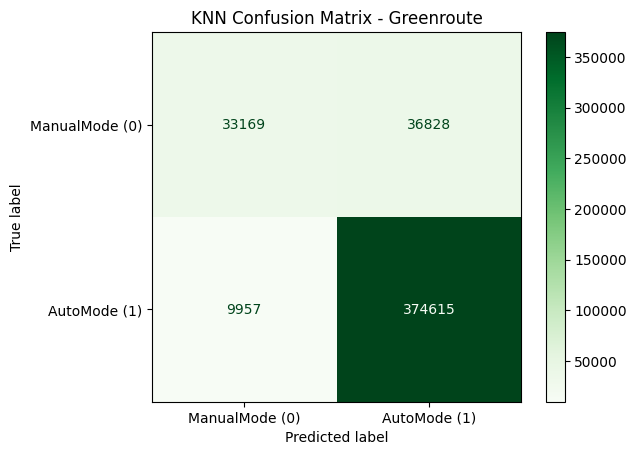

In [15]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ['ManualMode (0)', 'AutoMode (1)']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix with a title
disp.plot(cmap=plt.cm.Greens)
plt.title("KNN Confusion Matrix - Greenroute")
plt.show()

In [16]:
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}')

Balanced accuracy: 0.7240
